In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import cv2
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [41]:
class_ratio = {}

for folder in os.listdir("../Dataset/food-101/images"):
    class_ratio[folder] = len(os.listdir("../Dataset/food-101/images/"+folder))

In [45]:
list(class_ratio.keys())

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

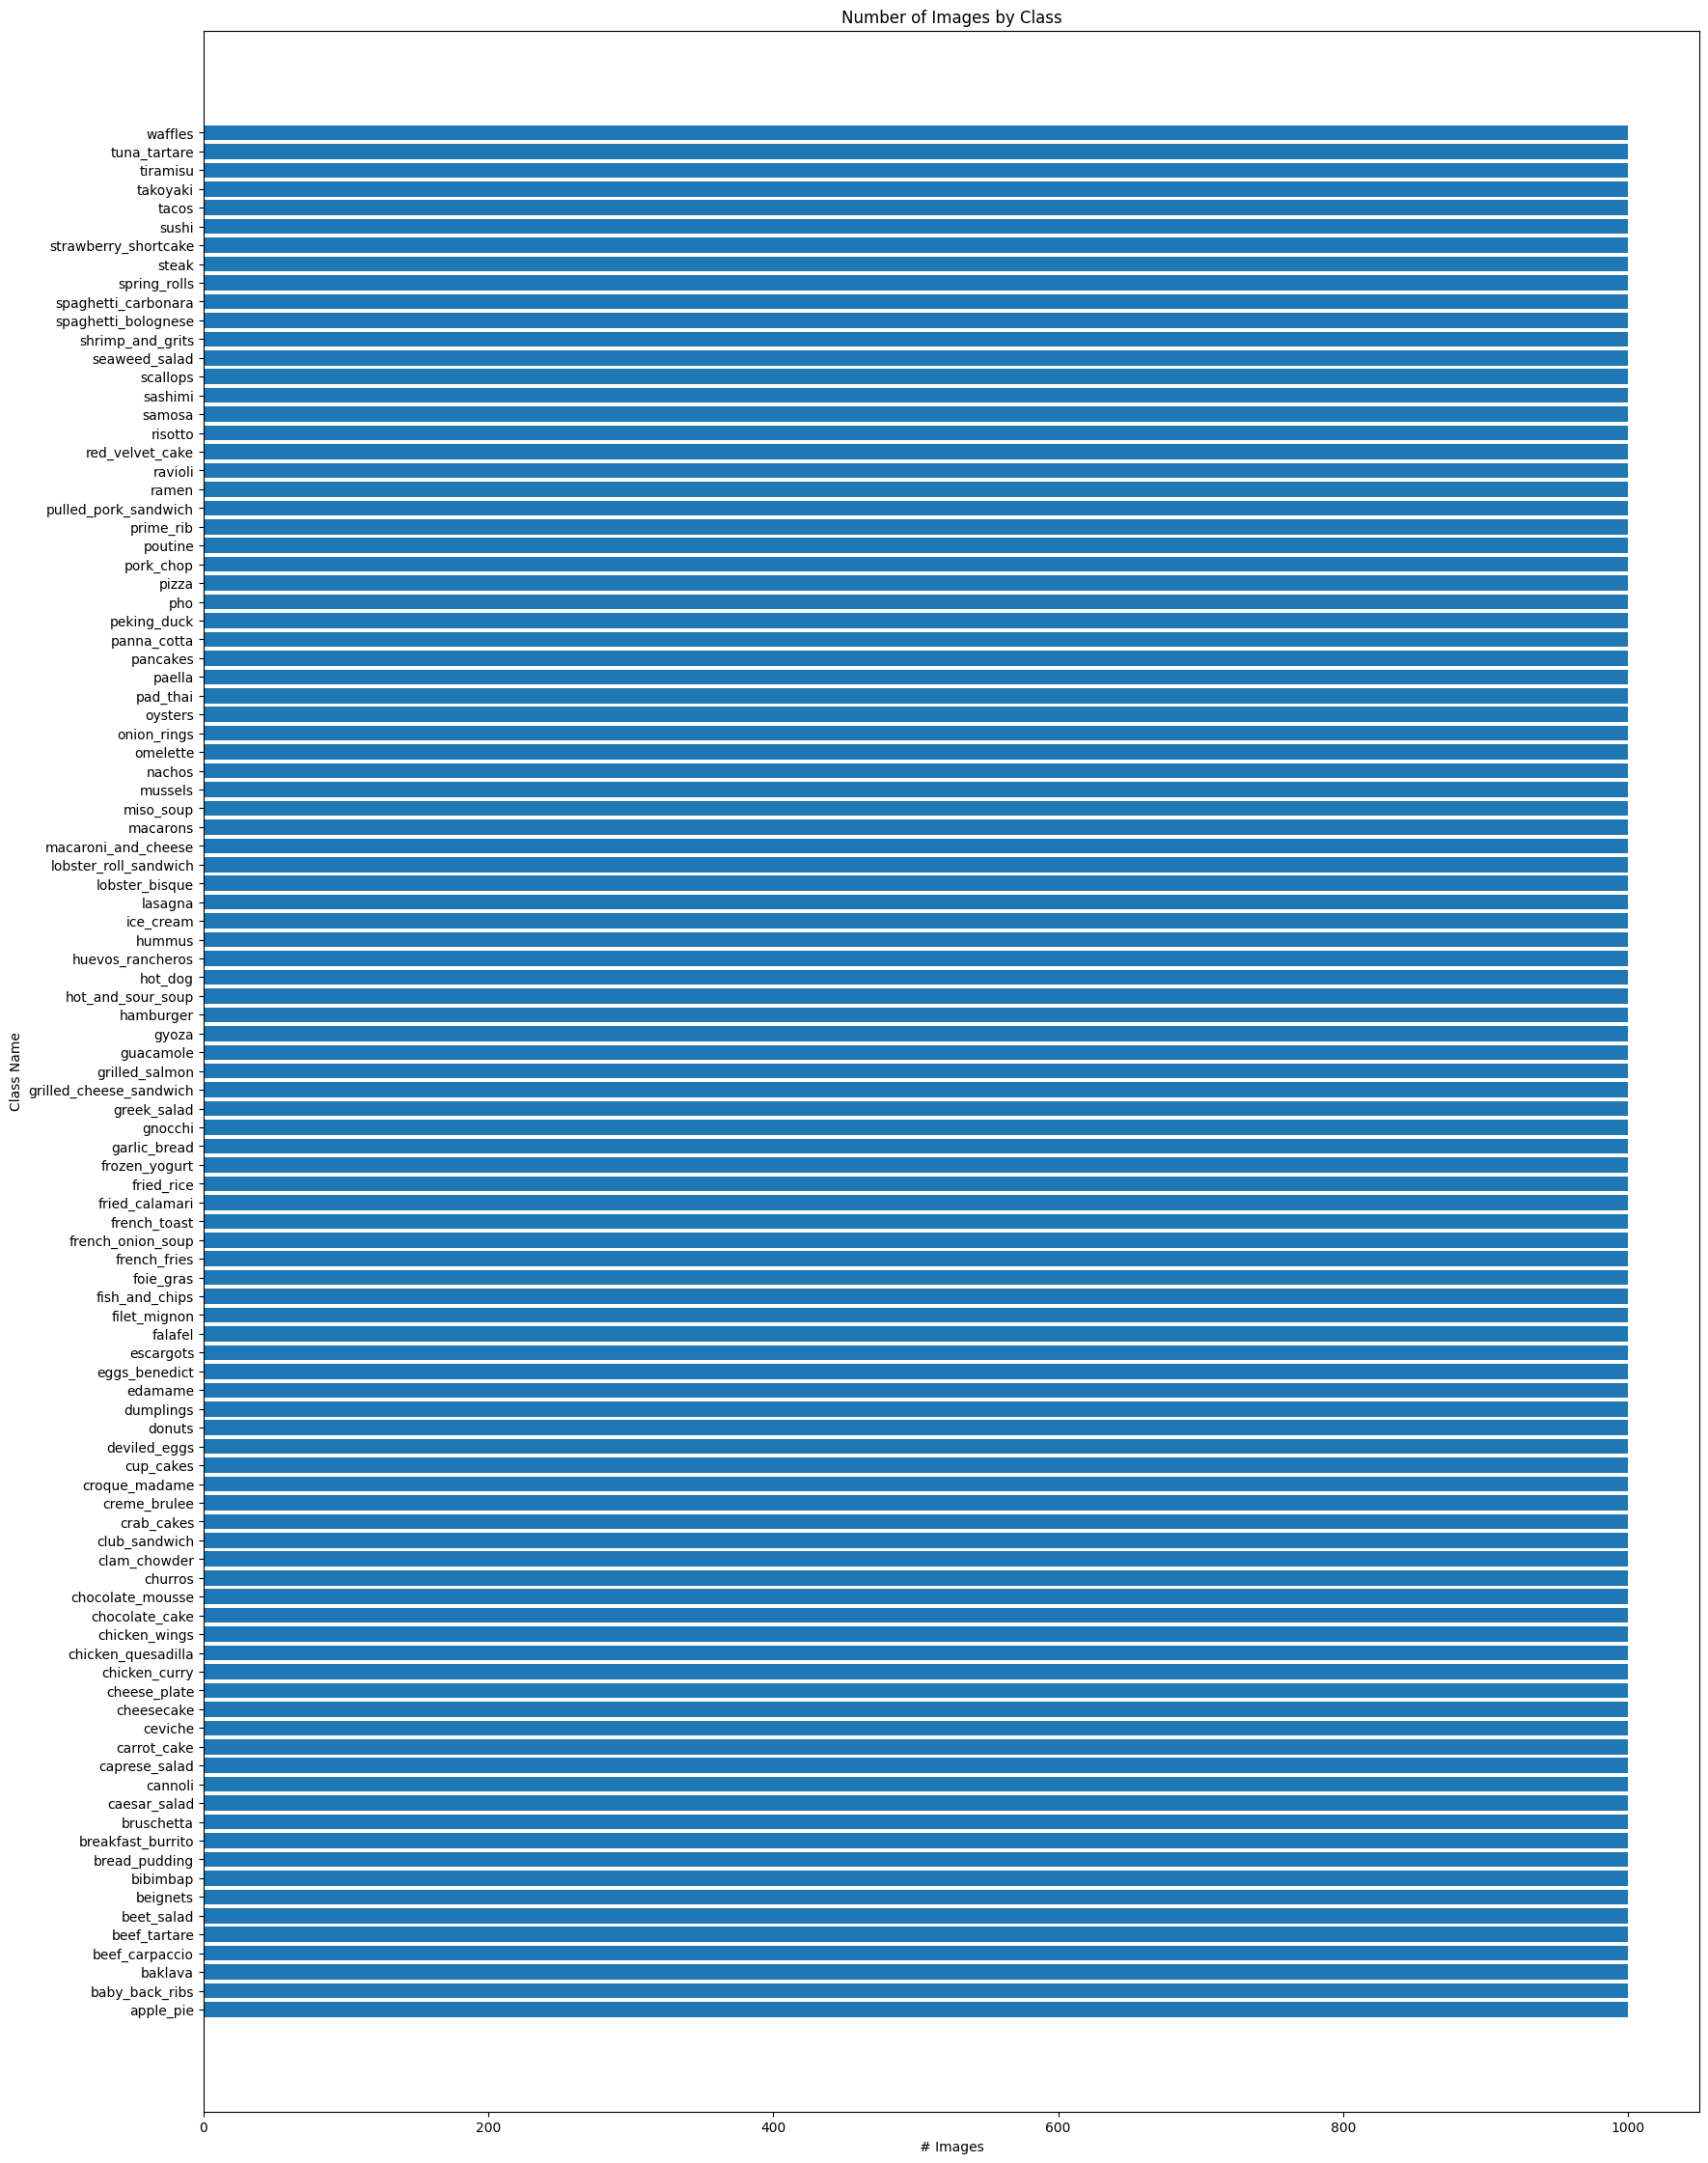

In [52]:
plt.figure(figsize=(20,28))
plt.barh(list(class_ratio.keys()), class_ratio.values());
plt.title("Number of Images by Class");
plt.ylabel('Class Name');
plt.xlabel('# Images');

In [ ]:
class_dims = {}

for folder in list(class_ratio.keys()):
    path = "../Dataset/food-101/images/"+folder

    dim_arr = []

    for image in os.listdir(path):
        im = cv2.imread(path +'/' + image)
        arr = np.array(im)
        
        h,w,d = arr.shape

        dim_arr.append((h,w))

    class_dims[folder] = dim_arr
    print(folder)
    

        


In [117]:
class_dims_0 = class_dims

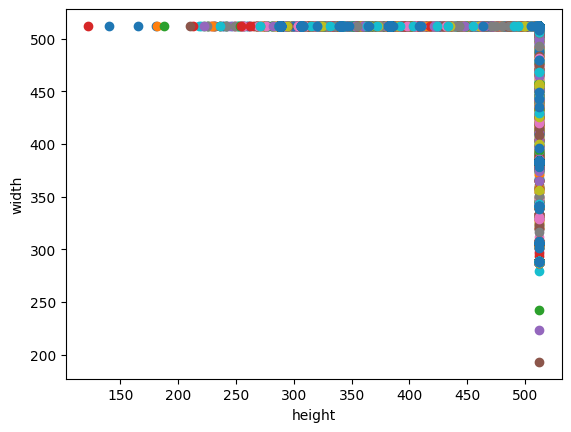

In [141]:
for classes in class_dims.keys():
    a = tuple(class_dims[classes])
    height, width = zip(*a)

    plt.scatter(height,width)
    plt.xlabel("height")
    plt.ylabel("width")


Creating data frame

In [171]:
rows = []

for folder in list(class_ratio.keys()):
    path = "../Dataset/food-101/images/"+folder

    for image in os.listdir(path):
        im_path = path +'/' + image
        rows.append(im_path)

    # rows.append(full_path)

        

In [214]:
df = pd.DataFrame(rows,columns=["Path"])

In [215]:
df

,Path
0,../Dataset/food-101/images/apple_pie/1005649.jpg
1,../Dataset/food-101/images/apple_pie/1011328.jpg
2,../Dataset/food-101/images/apple_pie/101251.jpg
3,../Dataset/food-101/images/apple_pie/1014775.jpg
4,../Dataset/food-101/images/apple_pie/1026328.jpg
...,...
100995,../Dataset/food-101/images/waffles/981485.jpg
100996,../Dataset/food-101/images/waffles/98238.jpg
100997,../Dataset/food-101/images/waffles/982668.jpg
100998,../Dataset/food-101/images/waffles/995085.jpg


In [216]:
class_label = []
j = 0

for j in range(0,101):
    for i in range(0,1000):
        class_label.append(list(class_ratio.keys())[j])


In [217]:
y_label = pd.DataFrame(class_label,columns=["Food"])

df = pd.concat([df,y_label],axis=1)

In [219]:
df

,Path,Food
0,../Dataset/food-101/images/apple_pie/1005649.jpg,apple_pie
1,../Dataset/food-101/images/apple_pie/1011328.jpg,apple_pie
2,../Dataset/food-101/images/apple_pie/101251.jpg,apple_pie
3,../Dataset/food-101/images/apple_pie/1014775.jpg,apple_pie
4,../Dataset/food-101/images/apple_pie/1026328.jpg,apple_pie
...,...,...
100995,../Dataset/food-101/images/waffles/981485.jpg,waffles
100996,../Dataset/food-101/images/waffles/98238.jpg,waffles
100997,../Dataset/food-101/images/waffles/982668.jpg,waffles
100998,../Dataset/food-101/images/waffles/995085.jpg,waffles


In [220]:
df.isna().sum()

Path    0
Food    0
dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Path    101000 non-null  object
 1   Food    101000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [224]:
df.dtypes

Path    object
Food    object
dtype: object

In [229]:
all_food_df = df

In [228]:
df = all_food_df

In [261]:
FOOD = "samosa"

df_FOOD = df[df["Food"] == FOOD]

df_RANDOM = df.sample(len(df_FOOD))

df_selected = pd.concat([df_FOOD,df_RANDOM],axis=0)




In [293]:
df_selected.reset_index(drop=True)

,Path,Food
0,../Dataset/food-101/images/samosa/1008131.jpg,samosa
1,../Dataset/food-101/images/samosa/1009326.jpg,samosa
2,../Dataset/food-101/images/samosa/1011601.jpg,samosa
3,../Dataset/food-101/images/samosa/101365.jpg,samosa
4,../Dataset/food-101/images/samosa/1015943.jpg,samosa
...,...,...
1995,../Dataset/food-101/images/sashimi/50156.jpg,sashimi
1996,../Dataset/food-101/images/hot_and_sour_soup/1...,hot_and_sour_soup
1997,../Dataset/food-101/images/tacos/673520.jpg,tacos
1998,../Dataset/food-101/images/crab_cakes/3545270.jpg,crab_cakes


In [294]:
features = []
IMG_SIZE = (128,128)

for image in df_selected["Path"]:
    img = cv2.imread(image)
    img = cv2.resize(img,IMG_SIZE)

    features.append(img)

In [299]:
x = np.array(features)
x = x / 255.0

y = df_selected["Food"]

In [303]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [308]:

le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)